# Attributing Victorian literature
#### W266 Final Project
#### Derrick Xiong, John Schulz

## Import Necessary Libraries

In [58]:
import numpy as np 
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Conv1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from keras.utils import plot_model
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

## Load Data and Clean
Data Cleaning Process:
- Data was cleaned by lemmatisizing or stemming all words in the provided dataset
- Stop words were also removed to eliminate noise in our model

In [24]:
df = pd.read_csv('dataset/Gungor_2018_VictorianAuthorAttribution_data-train.csv', encoding='latin-1')
df

,text,author
0,ou have time to listen i will give you the ent...,1
1,wish for solitude he was twenty years of age a...,1
2,and the skirt blew in perfect freedom about th...,1
3,of san and the rows of shops opposite impresse...,1
4,an hour s walk was as tiresome as three in a s...,1
...,...,...
53673,after surrounding and searching the whole plac...,50
53674,giant who could make a young earthquake or a w...,50
53675,waters of the lake at the bottom of the hill c...,50
53676,fingers and thumb in it exactly as it came out...,50


In [25]:
lemmatiser = WordNetLemmatizer()
stop_words = stopwords.words('english')
cleaned_text = []
for text in df['text']:
    lemmatised_words =''
    split_text = text.split()
    for word in split_text:
        if word not in stop_words:
            lemmatised_word=lemmatiser.lemmatize(word, pos="v")
            lemmatised_words += lemmatised_word + ' '
    cleaned_text.append(lemmatised_words)
df['text clean'] = cleaned_text
df

,text,author,text clean
0,ou have time to listen i will give you the ent...,1,ou time listen give entire story say may form ...
1,wish for solitude he was twenty years of age a...,1,wish solitude twenty years age possession perf...
2,and the skirt blew in perfect freedom about th...,1,skirt blow perfect freedom upper part wear hat...
3,of san and the rows of shops opposite impresse...,1,san row shop opposite impress upon vision last...
4,an hour s walk was as tiresome as three in a s...,1,hour walk tiresome three sensible english town...
...,...,...,...
53673,after surrounding and searching the whole plac...,50,surround search whole place could discover tra...
53674,giant who could make a young earthquake or a w...,50,giant could make young earthquake angry accord...
53675,waters of the lake at the bottom of the hill c...,50,water lake bottom hill curl kindness sympathy ...
53676,fingers and thumb in it exactly as it came out...,50,finger thumb exactly come hand never mind say ...


## Exploratory Data Analyses 
Exloring the words most commonly used by a few authors

In [36]:
one_sample_per_author = df.groupby('author').head(1)
one_sample_per_author.head(5)

,text,author,text clean
0,ou have time to listen i will give you the ent...,1,ou time listen give entire story say may form ...
912,who might have had rich miss asking so of both...,2,might rich miss ask party â nobody surprise ol...
1294,led forward avoiding the rough places in the f...,3,lead forward avoid rough place forest path hal...
1507,in her lips that were parted just then in a of...,4,lips part silent delight mirth stand top step ...
2990,district of new to maria â s a slight expressi...,6,district new maria â slight expression writer ...


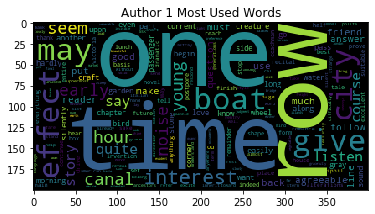

In [44]:
plt.title("Author 1 Most Used Words")
plt.imshow(WordCloud().generate(one_sample_per_author.iloc[0]['text clean']))


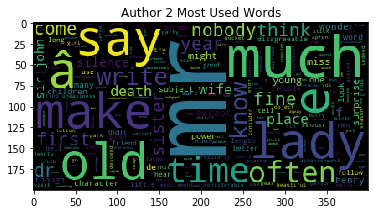

In [45]:
plt.title("Author 2 Most Used Words")
plt.imshow(WordCloud().generate(one_sample_per_author.iloc[1]['text clean']))

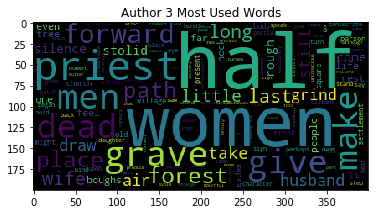

In [47]:
plt.title("Author 3 Most Used Words")
plt.imshow(WordCloud().generate(one_sample_per_author.iloc[2]['text clean']))

## Baseline Model
- Baseline model constructed using bag of words for both clean (no stopwords and lemmatised) and not clean text data.
- Configured using sci-kit learn built Gaussian Naive Bayes multi class classifier

#### Raw Text Baseline Model

In [51]:
X = df['text']
y = df['author'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.65, random_state=10)

In [54]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [55]:
model = GaussianNB()
model.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
y_predtrain = model.predict(X_train.toarray())

In [60]:
accuracyTrain = accuracy_score(y_train, y_predtrain)
print("Train Accuracy: " + str(accuracyTrain))

Train Accuracy: 0.986905839144089


In [61]:
y_pred = model.predict(X_test.toarray())

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy))

Test Accuracy: 0.41512137800578947


#### Cleaned Text Baseline Model


In [63]:
X = df['text clean']
y = df['author'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.65, random_state=10)

In [64]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [65]:
model = GaussianNB()
model.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
y_predtrain = model.predict(X_train.toarray())

In [67]:
accuracyTrain = accuracy_score(y_train, y_predtrain)
print("Train Accuracy: " + str(accuracyTrain))

Train Accuracy: 0.9597594081013466


In [68]:
y_pred = model.predict(X_test.toarray())

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy))

Test Accuracy: 0.43925367573299706


From the two Gaussian Naive Bayes Models above, there is a slight boost in accuracy for the test dataset when we remove stopwards and lemmatised the text. Additionally, the model appears to be overfitting the train dataset for both clean and not cleaned data since their is high accuracy for predicting the trained data but poor accuracy for the test data.

# Deep Learning : Nueral Nets
- ***EXPLAIN IMPLEMENTATION!!!!*** 

Initial Model No Convolution Layer, using not cleaned text

In [71]:
max_words = 100000
max_length = 1000
embedding_dim = 100
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df.text)

In [72]:
labels = to_categorical(df.author - 1)
data = tokenizer.texts_to_sequences(df.text)
data = pad_sequences(data, max_length)
train_data, test_data, train_label, test_label = train_test_split(data, labels, test_size = 0.10, random_state = 30)

In [73]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=train_data.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(50, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 100)         10000000  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 1000, 100)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
Total params: 10,085,450
Trainable params: 10,085,450
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
plot_model(model, to_file='model1.png', show_shapes=True, show_layer_names=True)


In [ ]:
epochs = 8
batch_size = 64
fitting = model.fit(train_data, train_label, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/8
437/680 [==================>...........] - ETA: 4:13 - loss: 3.4667 - accuracy: 0.1296

In [ ]:
score = model.evaluate(test_data, test_label, verbose=1)
print("Loss :", score[0])
print("Accuracy :", score[1])

In [ ]:
plt.title('Model Accuracy Per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],)
plt.plot(fitting.history['accuracy'])
plt.plot(fitting.history['val_accuracy'])
plt.show()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'])
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss'])
plt.show()

Added Convolutional Layer and test on not cleaned data

In [ ]:
max_words = 180000
max_length = 1000
embedding_dim = 100
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df.text)

In [ ]:
labels = to_categorical(df.author - 1)
data = tokenizer.texts_to_sequences(df.text)
data = pad_sequences(data, max_length)
train_data, test_data, train_label, test_label = train_test_split(data, labels, test_size = 0.10, random_state = 30)

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=train_data.shape[1]))
model.add(Conv1D(filters = 32, kernel_size = 5, padding="same", activation="relu"))
model.add(MaxPooling1D(pool_size = 2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(50, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [ ]:
plot_model(model, to_file='model2.png', show_shapes=True, show_layer_names=True)

In [ ]:
epochs = 8
batch_size = 64
fitting = model.fit(train_data, train_label, epochs=epochs, batch_size=batch_size,validation_split=0.1)

In [ ]:
score = model.evaluate(test_data, test_label, verbose=1)
print("Loss :", score[0])
print("Accuracy :", score[1])

In [ ]:
plt.title('Model Accuracy Per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],)
plt.plot(fitting.history['accuracy'])
plt.plot(fitting.history['val_accuracy'])
plt.show()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'])
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss'])
plt.show()

In [ ]:
max_words = 180000
max_length = 1000
embedding_dim = 100
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text clean'])

In [ ]:
labels = to_categorical(df.author - 1)
data = tokenizer.texts_to_sequences(df['text clean'])
data = pad_sequences(data, max_length)
train_data, test_data, train_label, test_label = train_test_split(data, labels, test_size = 0.10, random_state = 30)

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=train_data.shape[1]))
model.add(Conv1D(filters = 32, kernel_size = 5, padding="same", activation="relu"))
model.add(MaxPooling1D(pool_size = 2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(50, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [ ]:
plot_model(model, to_file='model2.png', show_shapes=True, show_layer_names=True)

In [ ]:
epochs = 20
batch_size = 64
fitting = model.fit(train_data, train_label, epochs=epochs, batch_size=batch_size,validation_split=0.1)

In [ ]:
score = model.evaluate(test_data, test_label, verbose=1)
print("Loss :", score[0])
print("Accuracy :", score[1])

In [ ]:
plt.title('Model Accuracy Per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],)
plt.plot(fitting.history['accuracy'])
plt.plot(fitting.history['val_accuracy'])
plt.show()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'])
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss'])
plt.show()